## We will follow the 6 CRISP-DM phases for the project1.  CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process which has six sequential phases.

## 1. Business understanding

#### As a tourist our objective is to find answers to below common questions using the Airbnb data freely available on Kaggle website for Seattle for 13 month period from January 2016 through January 2017.

- Q1. What were the important factors that determined price per night? How much do they contribute to the predicting daily price?
- Q2. What are the most popular Airbnb neighourhoods in Seattle?
- Q3. What were the busy periods for the Seattle AirBnBs?
- Q4. What was the per night average price during that period?

## -------------------------------------------------------------------------------------------------

## 2. Data understanding

### The following Airbnb activity is included in the Seattle dataset on Kaggle as csv files:

- Listings, including full descriptions and average review score
- Calendar, including listing id and the price and availability for that day
- Reviews, including unique id for each reviewer and detailed comments

###  We will load listing and Calendar datasets into dataframes for initial data exploration and identify need for data cleaning. Since we are using Reviews dataset for any test analytics, we won't load it.


### The notebook needs below libraries for data exploration and data cleaning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# read the listings.csv file
ldf0 = pd.read_csv("./listings.csv")

In [3]:
#Gather basic info about the dataset read
ldf0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

### The listings dataset has 3818 rows. Above table shows how many non-null values are present for each of the columns. In next section we will analyze groups of them as much as possible since there are 92 variables. 

## 3. Data preparation

### From the initial analysis below, we see need to clean up the data for missing values or dropping unneeded column. We will organize the data for modeling by selecting few variables, impute missing data for some of  them, and change data types. 

### We will create dummy variables for relevant categorical variables.

### Let's start with a report of missing values from raw input listings data, before any preprocessing:

In [4]:
def create_missing_values_table(df):
    '''
    This function provides stats on missing values on a given dataframe
    input - dataframe
    returns - dataframe that has missing value stats for each column in the input dataframe, including data types,
    number of missing values, and percentage of missing values
    '''
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # data types of those columns with missing values
    mis_dtypes = df[df.isnull()].dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_dtypes, mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'DataTypes',
        1: 'Missing Values',
        2: '% of Total Values'
    })

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [5]:
missing_values = create_missing_values_table(ldf0)
print("\n  BEFORE PREPREOCESSING \n")
missing_values

Your selected dataframe has 92 columns.
There are 45 columns that have missing values.

  BEFORE PREPREOCESSING 



,DataTypes,Missing Values,% of Total Values
license,float64,3818,100.0
square_feet,float64,3721,97.5
monthly_price,object,2301,60.3
security_deposit,object,1952,51.1
weekly_price,object,1809,47.4
notes,object,1606,42.1
neighborhood_overview,object,1032,27.0
cleaning_fee,object,1030,27.0
transit,object,934,24.5
host_about,object,859,22.5


### Let's plot % of missing values for all columns in the listings dataset.

<AxesSubplot: title={'center': 'Missing Values % before preprocessing / Clean up'}>

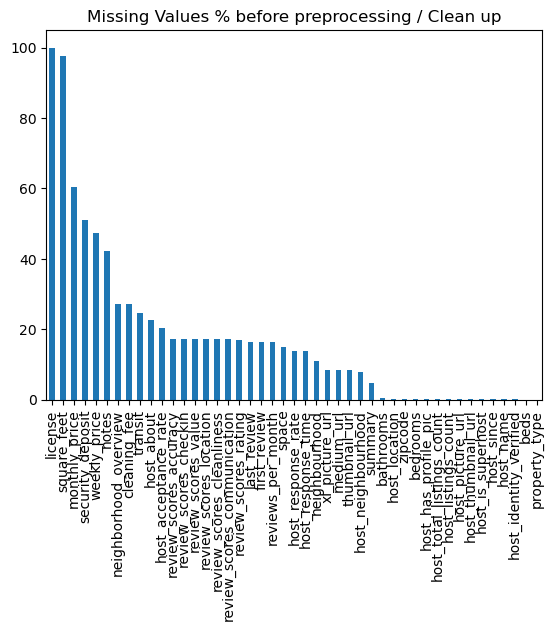

In [6]:
missing_values["% of Total Values"].plot(
    kind='bar', title='Missing Values % before preprocessing / Clean up')

## Now let's start the clean-up step by step for groups of columns.

### Drop id and text columns which we don't plan to use in the analysis. For example, scrape_id, last_scaped, name, summary, etc. columns are not relevant to answring the business questions we have. 

In [7]:
def drop_columns(df, lst):
    '''
    This function will drop the specified columns from the dataframe and return the modified dataframe.
    input: 
    df: dataframe
    lst: list of columns to be dropped 
    returns: 
    dataframe with the specified columns removed
    '''
    df = df.drop(lst, axis=1)
    return df

In [8]:
lstDropColumns = [
    'id', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
    'description', 'experiences_offered', 'neighborhood_overview', 'notes',
    'host_id', 'host_url', 'host_name', 'host_verifications', 'street',
    'neighbourhood', 'city', 'state', 'market', 'smart_location',
    'country_code', 'country', 'latitude', 'longitude', 'square_feet',
    'calendar_last_scraped', 'requires_license', 'license',
    'jurisdiction_names', 'zipcode', 'amenities', 'listing_url', 'host_since',
    'host_location', 'host_neighbourhood', 'zipcode', 'host_since'
]

# call the function
ldf1 = drop_columns(ldf0, lstDropColumns)

### Some of the numeric columns have \$, . or space that we can clean up:

In [9]:
def cleanNumbers(df, lst):
    '''
    function to clean numbers by removing non-numeric characters and replacing missing values with 0.
    input:
    df: dataframe to clean numbers
    lst: list of numeric columns to be cleaned-up
    returns: dataframe with cleaned numeric columns
    '''
    for col in lst:
        df[col] = df[col].str.replace(r'[^\d.]+', '')
        df[col] = pd.to_numeric(df[col], errors='coerce', downcast='float')
    return df

In [10]:
lstNumColumns = [
    'price', 'monthly_price', 'security_deposit', 'weekly_price',
    'cleaning_fee', 'extra_people', 'host_response_rate',
    'host_acceptance_rate'
]

# call the cleanNumbers function
ldf2 = cleanNumbers(ldf1, lstNumColumns)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10372\3498671099.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r'[^\d.]+', '')


### Let's check if those numbers columns cleaned and had datatype changed to float.

In [11]:
ldf2[lstNumColumns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 3818 non-null   float32
 1   monthly_price         1517 non-null   float32
 2   security_deposit      1866 non-null   float32
 3   weekly_price          2009 non-null   float32
 4   cleaning_fee          2788 non-null   float32
 5   extra_people          3818 non-null   float32
 6   host_response_rate    3295 non-null   float32
 7   host_acceptance_rate  3045 non-null   float32
dtypes: float32(8)
memory usage: 119.4 KB


### Create indicator columns to indicate presence or absence of.

In [12]:
def convert_to_indicator(df, lstIndColumns):
    """
    This function converts columns in dataframe to indicator variables.
    It adds new columns with 'has_' prefix to the dataframe and assigns values to the columns
    based on the presence of value in the original column.

    Inputs:
    df (DataFrame): Dataframe that contains the columns to be converted to indicator variables
    lstIndColumns (list): List of columns that need to be converted to indicator variables

    Returns:
    DataFrame : Dataframe with new indicator variables added and original columns removed.
    """

    for col in lstIndColumns:
        new_col = 'has_' + col
        df[new_col] = df[col].notna()
        df = df.drop(col, axis=1)
    return df

In [13]:
lstIndColumns = [
    'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
    'host_about', 'host_thumbnail_url', 'host_picture_url'
]

# call the function
ldf3 = convert_to_indicator(ldf2, lstIndColumns)

### Let's verify if it worked or not.

In [14]:
# check the column names of the dataframe before calling the function
print("Column names before: ", ldf2.columns)

# call the function
ldf3 = convert_to_indicator(ldf2, lstIndColumns)

# check the column names of the dataframe after calling the function
print("Column names after: ", ldf3.columns)

# check the values in the new columns
for col in lstIndColumns:
    new_col = 'has_' + col
    print(f'Values in {new_col} column: {ldf3[new_col].unique()}')

# check the shape of the dataframe before and after calling the function
print(f'Shape of dataframe before calling the function: {ldf2.shape}')
print(f'Shape of dataframe after calling the function: {ldf3.shape}')

Column names before:  Index(['transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_score

### It worked, row counts are same, we have new variables prefixed with has_, and old column have been dropped. 

### Let's move on to 'host_response_rate' and 'host_acceptance_rate' columns to check if they have missing values.

In [15]:
lstBlankColumns = ['host_response_rate', 'host_acceptance_rate']
print("% of missing values for ")
100 * ldf3[lstBlankColumns].isnull().sum() / len(ldf3)

% of missing values for 


host_response_rate      13.698271
host_acceptance_rate    20.246202
dtype: float64

In [16]:
print("Before imputation mean was:\n", ldf3[lstBlankColumns].mean())

Before imputation mean was:
 host_response_rate      94.886795
host_acceptance_rate    99.967163
dtype: float32


### These missing values can be imputed to average in 'host_response_rate', 'host_acceptance_rate' columns.

In [17]:
ldf3['host_response_rate'].interpolate(method='linear', inplace=True)
ldf3['host_acceptance_rate'].interpolate(method='linear', inplace=True)

In [18]:
print("After imputation mean was:\n", ldf3[lstBlankColumns].mean())

After imputation mean was:
 host_response_rate      94.916321
host_acceptance_rate    99.973808
dtype: float32


### Observe that the mean for these 2 columns increased after imputation, so it worked.

In [19]:
def replace_blanks_host_listings(df, lst):
    '''
    This function will replace blanks with 1 in given list of columns.
    Inputs:
        df (DataFrame): The input dataframe to update.
        lst (list): list of columns with blanks to be replaced.
    Returns:
        df (DataFrame): The updated dataframe with replaced blanks.
    '''
    for column in lst:
        df[column] = df[column].replace('', 1, inplace=True)
    return df

### Let's convert some of these categorical variables to dummy variable so that they can be used in the models:

In [20]:
def convert_to_dummies(df, lst):
    '''
    This function will iterate over the given columns and for each column, it will create dummy variables and concatenate them 
    to the dataframe and drop the original column.
    Inputs:
    df : DataFrame - the input dataframe to create dummy variables from
    lst : list - a list of columns names to be converted to dummy variables
    
    Returns:
    DataFrame - the modified dataframe with dummy variables without original variables
    '''
    for column in lst:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop([column], axis=1)
    return df

In [21]:
lstDummyColumns4 = [
    'host_response_time', 'property_type', 'room_type', 'accommodates',
    'bathrooms', 'bedrooms', 'beds', 'bed_type', 'guests_included',
    'extra_people', 'calendar_updated', 'cancellation_policy'
]

# Call the function
ldf6 = convert_to_dummies(ldf3, lstDummyColumns4)

In [22]:
lstCols = list(ldf6.columns)
print("list of columns :\n", lstCols)

list of columns :
 ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'is_location_exact', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month', 'has_transit', 'has_thumbnail_url', 'has_medium_url', 'has_picture_url', 'has_xl_picture_url', 'has_host_about', 'has_host_thumbnail_url', 'h

In [23]:
print("The number of variables increased to :", ldf6.shape[1])

The number of variables increased to : 216


### Removed below variables from creating dummy varibales since they are numeric and there are too many values in them:
#### 'minimum_nights','maximum_nights','availability_30', 'availability_60', 'availability_90', 'availability_365','calculated_host_listings_count','host_listings_count', 'host_total_listings_count' 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact','has_availability','instant_bookable','require_guest_profile_picture', 'require_guest_phone_verification'

###  Below are already created in previous step:
#### 'has_transit','has_thumbnail_url','has_medium_url','has_picture_url','has_xl_picture_url', 'has_host_about','has_host_thumbnail_url','has_host_picture_url'

### The "Number of reviews" for a listing is an important variable from both business and tourist point of view. Let's create a new column with the bins of steps of 10 and then create dummy columns for those bins. 

In [24]:
def create_reviews_dummies(df):
    '''
    This function will create new columns with bins for the "number_of_reviews" variable, and then create dummy columns for the bins.
    inputs :
    df : DataFrame - the input dataframe to create dummy variables from
    Returns:
    DataFrame - the modified dataframe with dummy variables for "number of reviews" variable
    '''
    df["number_of_reviews_binned"] = pd.cut(df["number_of_reviews"],
                                            bins=range(0, 100, 10),
                                            right=False,
                                            labels=range(0, 9))
    dummies = pd.get_dummies(df["number_of_reviews_binned"],
                             prefix="number_of_reviews")
    df = pd.concat([df, dummies], axis=1)
    df.drop(["number_of_reviews", "number_of_reviews_binned"],
            axis=1,
            inplace=True)
    return df

In [25]:
# Call the function to create dummy variables for binned no. of reviews for each listing
ldf7 = create_reviews_dummies(ldf6)
ldf7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 224 entries, host_response_rate to number_of_reviews_8
dtypes: bool(8), float32(7), float64(10), int64(7), object(12), uint8(180)
memory usage: 1.6+ MB


In [26]:
print("The number of variables increased to :", ldf7.shape[1])

The number of variables increased to : 224


### The "Number of reviews per month" for a listing is important variable from both business and tourist point of view. Let's create a new column with the bins of steps of 10 and then create dummy columns for those bins. 

In [27]:
def create_reviews_per_month_dummies(df):
    '''
    This function will create a new column "reviews_per_month_binned" by binning the values of the "reviews_per_month" column in steps of 1, 
    and then it will create dummy columns for each bin.
    Input: 
        - df : dataframe 
    Returns: 
        - dataframe : with dummy columns without the original column "reviews_per_month"
    '''
    df["reviews_per_month_binned"] = pd.cut(df["reviews_per_month"],
                                            bins=range(0, 15, 1),
                                            right=False,
                                            labels=range(0, 14))
    dummies = pd.get_dummies(df["reviews_per_month_binned"],
                             prefix="reviews_per_month")
    df = pd.concat([df, dummies], axis=1)
    df.drop(["reviews_per_month", "reviews_per_month_binned"],
            axis=1,
            inplace=True)
    return df

In [28]:
# Call the function to create dummy variables for binned no. of reviews per month for each listing
ldf8 = create_reviews_per_month_dummies(ldf7)
ldf8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 237 entries, host_response_rate to reviews_per_month_13
dtypes: bool(8), float32(7), float64(9), int64(7), object(12), uint8(194)
memory usage: 1.7+ MB


In [29]:
print("The number of variables increased to :", ldf8.shape[1])

The number of variables increased to : 237


### I think age of a customer review matters when looking at a Airbnb listing, to find put how much, let's create binned dummy variables for days_since_first_review:

In [30]:
def create_days_since_first_review_bins(df):
    '''
    This function will create a new column "days_since_first_review" and it will calculate the difference between the 
    "first_review" column and today's date. If the "first_review" column is not present or has missing values, then it will assign None to that record. 
    Then it will create dummy variables for each bin in the 10 day increments, using the "days_since_first_review" column.
    Input:
        df: Dataframe containing the "first_review" column
    Returns:
        Dataframe with added "days_since_first_review" column and dummy variables for that column in 10 day increments, without the original "days_since_first_review" column.
    '''
    todey = datetime.now()
    df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')

    df.loc[df['first_review'].notna(),
           'days_since_first_review'] = (todey - df['first_review']).dt.days

    df['days_since_first_review'].fillna(value=np.nan, inplace=True)
    bins = pd.cut(df['days_since_first_review'], [
        0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150,
        160, 170, 180, 190, 200, np.inf
    ],
                  labels=[
                      "0-10", "11-20", "21-30", "31-40", "41-50", "51-60",
                      "61-70", "71-80", "81-90", "91-100", "101-110",
                      "111-120", "121-130", "131-140", "141-150", "151-160",
                      "161-170", "171-180", "181-190", "191-200", "201+"
                  ])
    df = pd.concat(
        [df, pd.get_dummies(bins, prefix='days_since_first_review')], axis=1)
    df = df.drop(['days_since_first_review', 'first_review'], axis=1)
    return df

In [31]:
ldf9 = create_days_since_first_review_bins(ldf8)
ldf9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 257 entries, host_response_rate to days_since_first_review_201+
dtypes: bool(8), float32(7), float64(9), int64(7), object(11), uint8(215)
memory usage: 1.7+ MB


In [32]:
print("The number of variables increased to :", ldf9.shape[1])

The number of variables increased to : 257


### Similarly create binned dummy variables for days_since_last_review:

In [33]:
def create_days_since_last_review_bins(df):
    '''
    This function will create a new column "days_since_last_review" and it will calculate the difference between the
    "last_review" and today's date. If the last_review is not present then it will assign None to that record. The function will also create bins for the "days_since_last_review" variable, and create dummy variables for each bin.
    Input:
        - df: Dataframe containing a "last_review" column of datetime type.
    Returns:
        - Dataframe with dummy variables for "days since last review" variable without original variable.
    '''
    todey = datetime.now()
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

    df.loc[df['last_review'].notna(),
           'days_since_last_review'] = (todey - df['last_review']).dt.days

    df['days_since_last_review'].fillna(value=np.nan, inplace=True)
    bins = pd.cut(df['days_since_last_review'], [
        0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150,
        160, 170, 180, 190, 200, np.inf
    ],
                  labels=[
                      "0-10", "11-20", "21-30", "31-40", "41-50", "51-60",
                      "61-70", "71-80", "81-90", "91-100", "101-110",
                      "111-120", "121-130", "131-140", "141-150", "151-160",
                      "161-170", "171-180", "181-190", "191-200", "201+"
                  ])
    df = pd.concat(
        [df, pd.get_dummies(bins, prefix='days_since_last_review')], axis=1)
    df = df.drop(['days_since_last_review', 'last_review'], axis=1)
    return df

In [34]:
ldf10 = create_days_since_last_review_bins(ldf9)
ldf10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 277 entries, host_response_rate to days_since_last_review_201+
dtypes: bool(8), float32(7), float64(9), int64(7), object(10), uint8(236)
memory usage: 1.7+ MB


In [35]:
print("The number of variables increased to :", ldf10.shape[1])

The number of variables increased to : 277


### Next set of variables is the review scores, which I think is critical for both tourists and the Airbnb host. Earlier we saw about 16% to 17% rows have missing values for the review score columns. Let's review their summary statistics:

In [36]:
lstNumColumns2 = [
    "review_scores_rating", "review_scores_accuracy",
    "review_scores_cleanliness", "review_scores_checkin",
    "review_scores_communication", "review_scores_location",
    "review_scores_value"
]
ldf10[lstNumColumns2].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000
mean,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245
std,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259
min,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000
25%,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Note, all of these review score variables have range low 2s and 10, except review_scores_rating ranges from 0 to 100. Since all of them are numeric they can be used in the model as long as we scale them first. 

### We will impute those missing values in review score numeric columns to average of that column (even though % of missing values is greater than 5%).


In [37]:
def impute_missing_review_scores(df, lst):
    '''
    This function will impute the missing values in the given columns with the mean value of 
    the column and returns the dataframe.
    Input: 
        df (dataframe): Dataframe containing the columns to be updated.
        lst (list): List of numeric columns to be updated
    Returns:
        dataframe: Dataframe with imputed values and no dummy variables
    '''
    for column in lst:
        mean_val = df[column].mean()
        df[column].fillna(mean_val, inplace=True)
    return df

In [38]:
lstNumColumns2 = [
    "review_scores_rating", "review_scores_accuracy",
    "review_scores_cleanliness", "review_scores_checkin",
    "review_scores_communication", "review_scores_location",
    "review_scores_value"
]
# Call the function
ldf11 = impute_missing_review_scores(ldf10, lstNumColumns2)
ldf11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 277 entries, host_response_rate to days_since_last_review_201+
dtypes: bool(8), float32(7), float64(9), int64(7), object(10), uint8(236)
memory usage: 1.7+ MB


In [39]:
print("Before imputing : Mean Review Scores values")
ldf10[lstNumColumns2].mean()

Before imputing : Mean Review Scores values


review_scores_rating           94.539262
review_scores_accuracy          9.636392
review_scores_cleanliness       9.556398
review_scores_checkin           9.786709
review_scores_communication     9.809599
review_scores_location          9.608916
review_scores_value             9.452245
dtype: float64

In [40]:
print("After imputing : Mean Review Scores values")
ldf11[lstNumColumns2].mean()

After imputing : Mean Review Scores values


review_scores_rating           94.539262
review_scores_accuracy          9.636392
review_scores_cleanliness       9.556398
review_scores_checkin           9.786709
review_scores_communication     9.809599
review_scores_location          9.608916
review_scores_value             9.452245
dtype: float64

### Looking at the before and after average of review score columns, there is no difference so it worked.

In [41]:
print("The number of variables increased to :", ldf11.shape[1])

The number of variables increased to : 277


### Column 'security_deposit' has 51% missing and 'cleaning_fee' has 27% missing value. We can assume missing values in them, to mean that those fees don't apply to a listing and set them to 0.

In [42]:
def replace_missing_fees(df, lst):
    '''
    This function will replace missing values in the given columns with the mean value 
    of the column.
    Input:
    df - dataframe
    lst - list of numeric columns to be updated
    Returns:
    df - dataframe with missing values replaced with the mean value of the column
    '''
    for column in lst:
        df[column].replace('', 0, inplace=True)
        df[column].fillna(0, inplace=True)
    return df

In [43]:
lstNumColumns3 = ['security_deposit', 'cleaning_fee']
ldf12 = replace_missing_fees(ldf11, lstNumColumns3)
ldf12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 277 entries, host_response_rate to days_since_last_review_201+
dtypes: bool(8), float32(7), float64(9), int64(7), object(10), uint8(236)
memory usage: 1.7+ MB


### Most the values in 'weekly_price' are not poulated. We can assume if they are missing, then weekly_price can be calculated as 7\*daily price for a week so that we can find out if this factor has any effect on the models.

In [44]:
def replace_missing_weekly_price(df):
    '''
    This function takes a dataframe as input and sets weekly_price to price*7 if it's 
    missing or blank.
    Input:
    - df: dataframe
    Returns:
    - dataframe with weekly_price column filled with price*7 for missing or blank values.
    '''
    df["weekly_price"].fillna(df["price"] * 7, inplace=True)
    df["weekly_price"].replace('', np.nan, inplace=True)
    df["weekly_price"].fillna(df["price"] * 7, inplace=True)
    return df

In [45]:
ldf13 = replace_missing_weekly_price(ldf12)
ldf13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 277 entries, host_response_rate to days_since_last_review_201+
dtypes: bool(8), float32(7), float64(9), int64(7), object(10), uint8(236)
memory usage: 1.7+ MB


### Most the values in 'monthly_price' are not poulated. We can assume if they are missing, then monthly_price can be calculated to daily price times 30 for a month so that we can find out if this factor has any effect on the models.

In [46]:
def replace_missing_monthly_price(df):
    '''
    This function takes a dataframe as input and if monthly_price is missing or blank, it sets it to weekly_price*4:
    Input: 
        df: Dataframe, input dataframe
    Returns: 
        df: Dataframe, dataframe with missing monthly_price imputed with weekly_price*4
    '''
    df["monthly_price"].fillna(df["price"] * 30, inplace=True)
    df["monthly_price"].replace('', np.nan, inplace=True)
    df["monthly_price"].fillna(df["price"] * 30, inplace=True)
    return df

In [47]:
ldf14 = replace_missing_monthly_price(ldf13)
ldf14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 277 entries, host_response_rate to days_since_last_review_201+
dtypes: bool(8), float32(7), float64(9), int64(7), object(10), uint8(236)
memory usage: 1.7+ MB


### Let's save the results to a csv file.

In [48]:
ldf14.to_csv('newLDF14.csv', encoding='utf-8')

In [49]:
print("At this point, the prepared dataset has", ldf14.shape[1],
      " columns and ", ldf14.shape[0], "rows.")

At this point, the prepared dataset has 277  columns and  3818 rows.


### Report missing values after preprocessing and clean up of the listings data:

Your selected dataframe has 277 columns.
There are 5 columns that have missing values.

  AFTER PREPREOCESSING 
                           DataTypes  Missing Values  % of Total Values
host_is_superhost            object               2                0.1
host_listings_count         float64               2                0.1
host_total_listings_count   float64               2                0.1
host_has_profile_pic         object               2                0.1
host_identity_verified       object               2                0.1


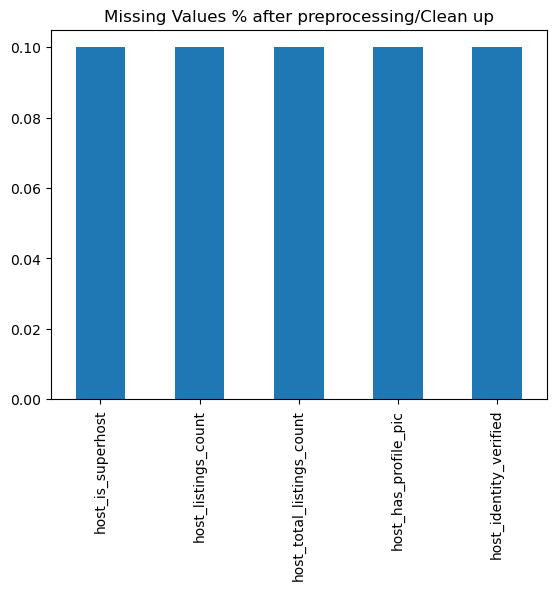

In [50]:
missing_values = create_missing_values_table(ldf14)
missing_values["% of Total Values"].plot(
    kind='bar', title='Missing Values % after preprocessing/Clean up')
print("\n  AFTER PREPREOCESSING \n", missing_values)

### As we see above, since there are only 5 variables with 2 rows, let's drop rows with missing values 

In [51]:
ldf15 = ldf14.dropna(inplace=False, axis=0)
ldf15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 0 to 3817
Columns: 277 entries, host_response_rate to days_since_last_review_201+
dtypes: bool(8), float32(7), float64(9), int64(7), object(10), uint8(236)
memory usage: 1.8+ MB


### Let's run final missing values report.

In [52]:
missing_values = create_missing_values_table(ldf15)

Your selected dataframe has 277 columns.
There are 0 columns that have missing values.


## 4. Modeling 
####   Now that we have completed data preprocessing, we will select models for each the business question. To find factors that determine price, which is a numerical response variable, we will consider two regression models, 
- Linear Regression with recursive approach to find the best variables for the model,
- LassoCV that will eliminate variables and also perform five-fold cross-validation. We will evaluate model performance by using the list of variables suggested by these 2 models and run  Linear Regression.
    
### Q1. What were the important factors that determined price per night? How much do they contribute to the predicting daily price?
#### We will use Linear Regression to find factors that can predict daily price below.

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


def select_important_columns(df, responseCol="", featureKnt=10):
    '''
    This function uses feature importance from Linear Regressor to identify the top n columns that are most important for 
    predicting the given response variable. It returns a list of the column names corresponding to the selected columns.
    Input:
        df (pandas dataframe): Dataframe on which to run the LinearRegression model
        responseCol (str): Response variable in the input dataframe
        featureKnt (int): Maximum number of features to return as predictors
    Returns:
        list: List of column names corresponding to the selected columns
    '''

    X = df.drop(responseCol, axis=1)
    y = df[responseCol]
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=featureKnt)
    rfe.fit(X, y)
    return X.columns[rfe.support_]

In [54]:
def keep_numeric_columns(df):
    """
    Function to keep only numeric columns in a given dataframe for regression analysis
    Input:
        df (pandas dataframe): the input dataframe from which to keep numeric variables
    Returns:
        df (pandas dataframe): the output dataframe which only contains numeric variables
    """
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    return df[numeric_columns]

### Let's find out how many numeric variables are there in the preprocessed listings dataset.

In [55]:
numeric_columns = ldf15.select_dtypes(include=[np.number]).columns.tolist()
print("Number of Numeric columns in the preprocessed listings dataset = ",
      len(numeric_columns))

Number of Numeric columns in the preprocessed listings dataset =  259


### Keep only numeric variables in a dataframe used for regression analysis.

In [56]:
ldf15.info()

ldf16 = keep_numeric_columns(ldf15)
## dropped require_guest_profile_picture_f since in the regression both *picture_t and *_picture_f showed up
print("-------After dropping nonnumeric columns:------")
ldf16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 0 to 3817
Columns: 277 entries, host_response_rate to days_since_last_review_201+
dtypes: bool(8), float32(7), float64(9), int64(7), object(10), uint8(236)
memory usage: 1.8+ MB
-------After dropping nonnumeric columns:------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 0 to 3817
Columns: 259 entries, host_response_rate to days_since_last_review_201+
dtypes: float32(7), float64(9), int64(7), uint8(236)
memory usage: 1.5 MB


# Now let's run the Linear Regression and see what are the 30 important predictors for the price.

In [57]:
missing_values = create_missing_values_table(ldf16)

Your selected dataframe has 259 columns.
There are 0 columns that have missing values.


In [58]:
numPredictors = 30
importantPredictors = select_important_columns(ldf16, "price", numPredictors)

In [59]:
print("Top ", numPredictors, " Important Predictors of Price are:\n",
      list(importantPredictors))

Top  30  Important Predictors of Price are:
 ['accommodates_16', 'beds_10.0', 'beds_15.0', 'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed', 'guests_included_13', 'extra_people_5.0', 'extra_people_6.0', 'extra_people_7.0', 'extra_people_8.0', 'extra_people_9.0', 'extra_people_10.0', 'extra_people_12.0', 'extra_people_13.0', 'extra_people_19.0', 'extra_people_21.0', 'extra_people_27.0', 'extra_people_28.0', 'extra_people_33.0', 'extra_people_36.0', 'extra_people_44.0', 'extra_people_48.0', 'extra_people_55.0', 'extra_people_68.0', 'extra_people_85.0', 'extra_people_175.0', 'extra_people_300.0']


## Let's use these predictors to get model details by running Linear Regression:

In [60]:
import statsmodels.api as sm

#define predictor variables
X = ldf16[importantPredictors]

#define response variable
y = ldf16["price"]

#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model1 = sm.OLS(y, X).fit()

#view model summary
print(model1.summary())

## reference https://www.statology.org/sklearn-linear-regression-summary/

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     7.833
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           1.44e-29
Time:                        21:54:20   Log-Likelihood:                -22492.
No. Observations:                3816   AIC:                         4.504e+04
Df Residuals:                    3788   BIC:                         4.522e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.19

In [61]:
# Sort the predictors by descending value of the coefficient
sorted_predictors1 = model1.params.sort_values(ascending=False)

# Print the sorted predictors
sorted_predictors1.head(29)

bed_type_Real Bed         2.198220e+14
bed_type_Airbed           2.198220e+14
bed_type_Futon            2.198220e+14
bed_type_Couch            2.198220e+14
bed_type_Pull-out Sofa    2.198220e+14
guests_included_13        7.555973e+11
beds_15.0                 2.870070e+11
beds_10.0                 2.870070e+11
extra_people_12.0        -3.401453e+01
extra_people_175.0       -3.588854e+01
extra_people_10.0        -3.596101e+01
extra_people_8.0         -3.778746e+01
extra_people_300.0       -3.942980e+01
extra_people_13.0        -4.588863e+01
extra_people_9.0         -4.928842e+01
extra_people_85.0        -4.988885e+01
extra_people_5.0         -5.055067e+01
extra_people_27.0        -5.088862e+01
extra_people_19.0        -5.397577e+01
extra_people_48.0        -5.888866e+01
extra_people_36.0        -5.888875e+01
extra_people_28.0        -5.922289e+01
extra_people_7.0         -5.986663e+01
extra_people_55.0        -6.411522e+01
extra_people_6.0         -7.314388e+01
extra_people_44.0        

### Above model summary shows R-squared of 0.213 close to Adj. R-squared of 0.208 indicating number of predictors does not penalize the model. The notes also indicate strong multicollinearity problems with the data. 

## Let's try another model, Lasso Regression with Cross Validation. Lasso Regession is used when number of predictors is high. Cross validation will rotate the data in the train and test sets by splitting it first. First define a function:

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler


def select_predictors_LassoCV(data, response):
    '''
    This function first removes the response variable from the list of predictors, then creates the feature matrix X and
    target variable y. It then initializes the LassoCV model with 5-fold cross-validation and normalization. It then fits
    the model to the data and gets the indices of the non-zero coefficients. Finally, the function returns a list of the
    predictors with non-zero coefficients.
    inputs 
        data = dataframe on which to run the model
        response = response variable
    returns
        list of nonzero_predictors        
    '''
    predictors = data.columns.tolist()
    predictors.remove(response)
    X = data[predictors]
    y = data[response]

    # Initialize the pipeline
    pipeline = Pipeline([('scaler', StandardScaler()),
                         ('lasso', LassoCV(cv=5, precompute=False))])

    # Fit the pipeline to the data
    pipeline.fit(X, y)

    # Get the indices of the non-zero coefficients
    nonzero_coef_indices = np.nonzero(pipeline.named_steps['lasso'].coef_)[0]

    # Get the names of the predictors with non-zero coefficients
    nonzero_predictors = [predictors[i] for i in nonzero_coef_indices]

    return nonzero_predictors

### Lets' call the function above that runs LassoCV.

In [63]:
predictors_list = select_predictors_LassoCV(ldf16, "price")
print("Important Predictors by Lasso Cross Validation:\n", predictors_list)

Important Predictors by Lasso Cross Validation:
 ['host_response_rate', 'host_listings_count', 'host_total_listings_count', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'maximum_nights', 'availability_30', 'availability_365', 'host_response_time_a few days or more', 'host_response_time_within an hour', 'room_type_Entire home/apt', 'room_type_Shared room', 'accommodates_5', 'accommodates_7', 'accommodates_8', 'accommodates_10', 'accommodates_15', 'bathrooms_1.0', 'bathrooms_2.5', 'bathrooms_3.0', 'bathrooms_3.5', 'bathrooms_4.0', 'bedrooms_1.0', 'bedrooms_3.0', 'bedrooms_4.0', 'bedrooms_5.0', 'bedrooms_6.0', 'beds_1.0', 'beds_4.0', 'beds_5.0', 'beds_9.0', 'guests_included_4', 'guests_included_5', 'guests_included_11', 'guests_included_13', 'extra_people_10.0', 'extra_people_30.0', 'extra_people_45.0', 'extra_people_68.0', 'extra_people_71.0', 'extra_people_80.0', 'extra_people_175.0', 'extra_people_250.0', 'calendar_updated_13 months ago', 'calendar_updated_4 mon

In [64]:
print("Count of Important Predictors by Lasso Cross Validation:\n",
      len(predictors_list))

Count of Important Predictors by Lasso Cross Validation:
 58


## Let's use these predictors to get model details by running Linear Regression:

In [65]:
## lets use these predictors to get the model details
import statsmodels.api as sm

#define predictor variables
X = ldf16[predictors_list]

#define response variable
y = ldf16["price"]

#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model2 = sm.OLS(y, X).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1361.
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:54:26   Log-Likelihood:                -16763.
No. Observations:                3816   AIC:                         3.364e+04
Df Residuals:                    3759   BIC:                         3.400e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [66]:
# Sort the predictors by descending value of the coefficient
sorted_predictors2 = model2.params.sort_values(ascending=False)

In [67]:
len(sorted_predictors2)

59

## 5. Evaluation
### Which model best meets the business objectives?
#### The LassoCV model explains the 95% of the variance for 60 variables predicting the price. Lasso regression is helpful in getting rid of variables when there are too many of them, in our case we had 350+. 

### Question\#1. What were the important factors that determined price per night? How much do they contribute to the predicting daily price?

#### The results from the LassoCV regression provides us with Predictors for daily rental price and their contribution below.

In [68]:
# Print the sorted predictors
print("Question#1a response: Predictors for daily rental price are:\n")
sorted_predictors2.head(60)

Question#1a response: Predictors for daily rental price are:



guests_included_11                       175.342082
calendar_updated_13 months ago            61.233930
extra_people_71.0                         49.105739
guests_included_13                        48.873078
extra_people_68.0                         48.873078
bedrooms_6.0                              39.777646
bathrooms_4.0                             26.499968
const                                     17.160415
calendar_updated_6 months ago             14.918246
accommodates_10                           14.134808
accommodates_7                            11.648552
bedrooms_5.0                              11.231294
beds_9.0                                   8.401141
bedrooms_4.0                               7.655836
guests_included_5                          6.769336
bathrooms_3.5                              5.874868
host_response_time_a few days or more      5.784416
beds_5.0                                   5.302150
bathrooms_2.5                              5.159962
extra_people

### Let's create a visualization by plotting the predictors for their contribution to predicting price.

<AxesSubplot: title={'center': 'Q1b: How much do predictors contribute to the predicting daily price?'}, xlabel='Predictors', ylabel='$ Contribution to the Price Prediction'>

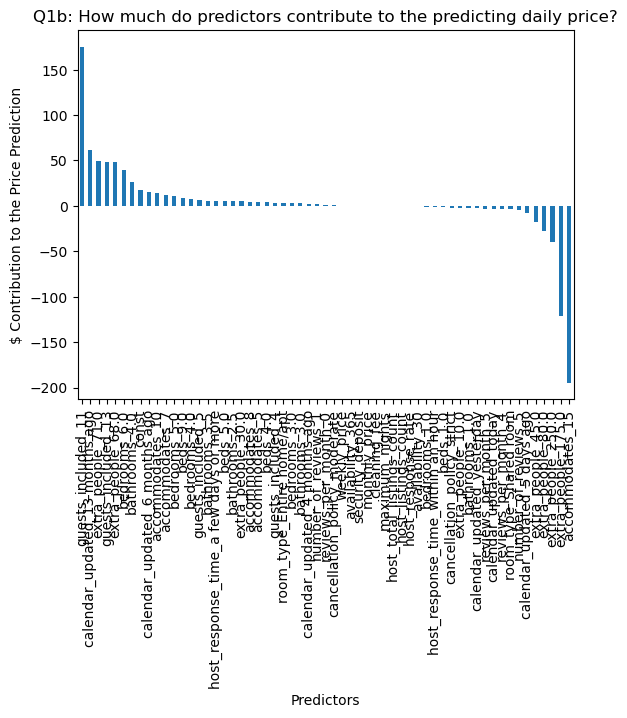

In [69]:
sorted_predictors2.plot(
    kind='bar',
    title=
    'Q1b: How much do predictors contribute to the predicting daily price?',
    xlabel='Predictors',
    ylabel="$ Contribution to the Price Prediction")

### Above bar chart compares each predictor that contributes positively as well as negatively to the daily average rental price. As we can see from above chart, the number of bedrooms, beds, number of guests, lower extra people (or guest charges) contribute significantly to the price, whereas just one bed, one bedroom, or higher extra guest charges negatively affects the price.

## -----------------------------------------------------------------------------------------------------------------------------

### For question\#2, we have to find the most popular neighourhoods in Seatle. This can be done simply by grouping the data by neighbourhood_group_cleansed column and counting the number of listings available for each combination. We can also create a visualization as bar chart.

In [70]:
popular_neighourhoods = ldf0.groupby(
    'neighbourhood_group_cleansed')['id'].count().sort_values(ascending=False)
#popular_neighourhoods.head(10)

In [71]:
print("Question#2 Seatle AirBnb Popular Neighourhoods by number of Listings\n")
popular_neighourhoods

Question#2 Seatle AirBnb Popular Neighourhoods by number of Listings



neighbourhood_group_cleansed
Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: id, dtype: int64

### We can also create a visualization as bar chart.

<AxesSubplot: title={'center': "Question#2 Seatle AirBnb Popular Neighourhoods Jan'16 - Jan'17"}, xlabel='Neighourhoods', ylabel='Number of Listings'>

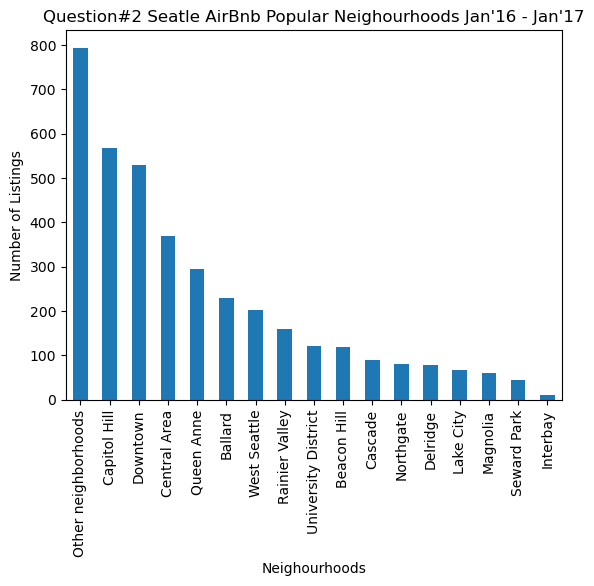

In [72]:
popular_neighourhoods.plot(
    kind='bar',
    title="Question#2 Seatle AirBnb Popular Neighourhoods Jan'16 - Jan'17",
    ylabel='Number of Listings',
    xlabel='Neighourhoods',
    grid=False,
    legend=False)

### The chart above shows, for the city of Seattle, specifically Capitol Hill, Downtown, Central Area, Queen Anne, Ballard, and Other neighborhoods are the most popular. This is based on number of Airbnb listings in each of the cleansed neighbourhood group variable.


# ============================================================
# Now let's look at the second dataset, calendar.csv following CRISP-DM:

## 2. Data Understanding
### Collect initial data by reading the calendar.csv file and describe the data by printing summary info.

In [73]:
caldf = pd.read_csv("./calendar.csv")
caldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


### Data Exploration 
### As we see from above, number of variables is 4 but there are 1.3 million rows. First three columns have no missing values. Let's see % of missing values from for the price variable:

In [74]:
missing_values = create_missing_values_table(caldf)
print("Missing value from Calendar data\n", missing_values)

Your selected dataframe has 4 columns.
There are 1 columns that have missing values.
Missing value from Calendar data
       DataTypes  Missing Values  % of Total Values
price    object          459028               32.9


## 3. Data Preparation

### We are selecting the calendar data as provides the actual booking by the listing ad and the dates. It will help us answering questions 3 and 4. Let's clean the price column by removing non-numeric chars.

In [75]:
CalNumColumns = ['price']
caldf1 = cleanNumbers(caldf, CalNumColumns)
caldf1.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10372\3498671099.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r'[^\d.]+', '')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       934542 non-null   float32
dtypes: float32(1), int64(1), object(2)
memory usage: 37.2+ MB


### Let's report missing values on the original calendar dataset.

Your selected dataframe has 4 columns.
There are 1 columns that have missing values.

  BEFORE PREPREOCESSING 
       DataTypes  Missing Values  % of Total Values
price   float32          459028               32.9


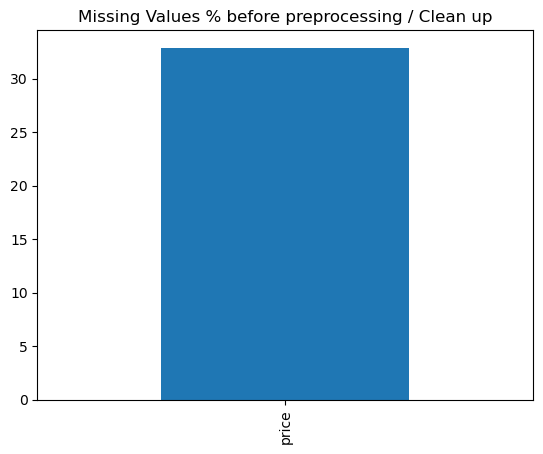

In [76]:
missing_values = create_missing_values_table(caldf1)
missing_values["% of Total Values"].plot(
    kind='bar', title='Missing Values % before preprocessing / Clean up')
print("\n  BEFORE PREPREOCESSING \n", missing_values)

### Even though 32% of the rows have missing price, we need not drop those rows since price is missing only when predictor available is False. Let's make a copy of the dataset.

In [77]:
caldf2 = caldf1.copy()

### Create new caldate column with datatype datetime so we can create date-specific variables for later analysis; let's drop the original date column.

In [78]:
caldf3 = caldf2.copy()
caldf3['caldate'] = pd.to_datetime(caldf2['date'])

#Create a new columns for the year, month, day, and month_year
caldf3['year'] = caldf3['caldate'].dt.year
caldf3['month'] = caldf3['caldate'].dt.month
caldf3['day'] = caldf3['caldate'].dt.day
caldf3['month_year'] = caldf3['caldate'].dt.to_period('M')
caldf3.drop('date', axis=1, inplace=True)
caldf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   available   1393570 non-null  object        
 2   price       934542 non-null   float32       
 3   caldate     1393570 non-null  datetime64[ns]
 4   year        1393570 non-null  int64         
 5   month       1393570 non-null  int64         
 6   day         1393570 non-null  int64         
 7   month_year  1393570 non-null  period[M]     
dtypes: datetime64[ns](1), float32(1), int64(4), object(1), period[M](1)
memory usage: 79.7+ MB


### Since the "available" column only has t and f, let's change datatype to boolean

In [79]:
caldf3['available'] = caldf3['available'].apply(lambda x: True
                                                if x == 't' else False)
caldf3['available'] = caldf3['available'].astype(bool)
caldf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   available   1393570 non-null  bool          
 2   price       934542 non-null   float32       
 3   caldate     1393570 non-null  datetime64[ns]
 4   year        1393570 non-null  int64         
 5   month       1393570 non-null  int64         
 6   day         1393570 non-null  int64         
 7   month_year  1393570 non-null  period[M]     
dtypes: bool(1), datetime64[ns](1), float32(1), int64(4), period[M](1)
memory usage: 70.4 MB


### Let's create a new variable availableday as an integer that will help count number of available days for each listing on a date.

In [80]:
## Since the available column only has t and f, let's convert to boolean
caldf3['availableday'] = caldf3['available'].apply(lambda x: 0 if x else 1)
#caldf3['availableday'] = caldf3['available'].astype(int, )

caldf3['availableday'] = pd.to_numeric(caldf3['availableday'],
                                       downcast='float')  ## errors='coerce')

caldf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   listing_id    1393570 non-null  int64         
 1   available     1393570 non-null  bool          
 2   price         934542 non-null   float32       
 3   caldate       1393570 non-null  datetime64[ns]
 4   year          1393570 non-null  int64         
 5   month         1393570 non-null  int64         
 6   day           1393570 non-null  int64         
 7   month_year    1393570 non-null  period[M]     
 8   availableday  1393570 non-null  float32       
dtypes: bool(1), datetime64[ns](1), float32(2), int64(4), period[M](1)
memory usage: 75.8 MB


### Report missing values from the processed calendar data.

In [81]:
missing_values = create_missing_values_table(caldf3)
print(missing_values)

Your selected dataframe has 9 columns.
There are 1 columns that have missing values.
      DataTypes  Missing Values  % of Total Values
price   float32          459028               32.9


## 4. Modeling 

### Question\#3. What were the busy periods for the Seattle AirBnBs?

### For Q3 we don't really need a model; we can simplyt group the data by month_year column and count the number of listings available for each combination, to find the busiest period by year and month.

In [82]:
busy_period = caldf3.groupby('month_year')['availableday'].sum().sort_values(
    ascending=False)
busy_period.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 13 entries, 2016-01 to 2017-01
Freq: M
Series name: availableday
Non-Null Count  Dtype  
--------------  -----  
13 non-null     float32
dtypes: float32(1)
memory usage: 156.0 bytes


In [83]:
print("Busy period for Seattle AirBnbs, available days/month\n", busy_period)

Busy period for Seattle AirBnbs, available days/month
 month_year
2016-01    47665.0
2016-07    44136.0
2016-08    42011.0
2016-04    38503.0
2016-05    38387.0
2016-02    37401.0
2016-06    37296.0
2016-09    37294.0
2016-10    35920.0
2016-03    34420.0
2016-11    32760.0
2016-12    31297.0
2017-01     1938.0
Freq: M, Name: availableday, dtype: float32


### Let's plot Seattle AirBnb Monthly Availability using the summary data above.

<AxesSubplot: title={'center': "Q3: Busy Period for Seattle AirBnbs by Monthly Availability, Jan'16 - Jan'17"}, xlabel='Month-Year', ylabel='Available days'>

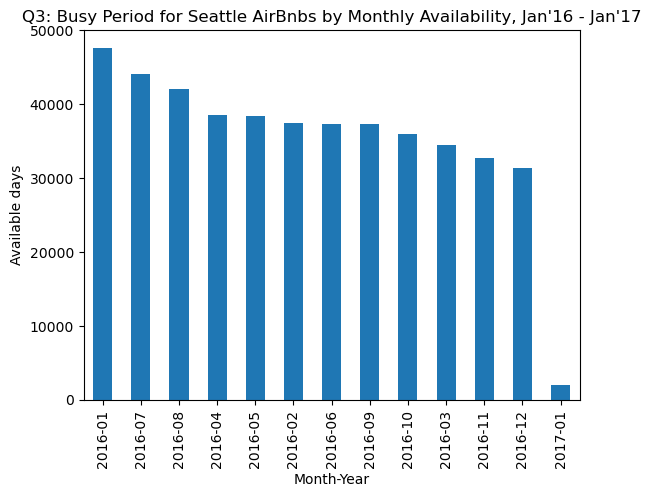

In [84]:
busy_period.plot(
    kind='bar',
    xlabel='Month-Year',
    ylabel='Available days',
    grid=False,
    legend=False,
    title=
    "Q3: Busy Period for Seattle AirBnbs by Monthly Availability, Jan'16 - Jan'17"
)

### From the bar chart above, we can see December as busy month in Seattle due to least number of available listings. January'17 is outlier since data incomplete for that month.

## ---------------------------------------------------------------------------------------------------------------------------

### Question\#4. What was the per night average price during that period?

### For Q4, we don't really need a model; we can simply group the data by month_year column and average price for each combination, to find the average price by year and month.

In [85]:
# Calculate monthly aevrage price for the availabe period
mean_price_table = caldf3.groupby('month_year')['price'].mean()

# calculate the average price
average_price = caldf3['price'].mean()

mean_price_table.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 13 entries, 2016-01 to 2017-01
Freq: M
Series name: price
Non-Null Count  Dtype  
--------------  -----  
13 non-null     float32
dtypes: float32(1)
memory usage: 156.0 bytes


In [86]:
# Drop time period with no price data
caldf4_mpt = mean_price_table.dropna()

In [87]:
# Review the monthly aevrage price for the availabe period
caldf4_mpt.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 13 entries, 2016-01 to 2017-01
Freq: M
Series name: price
Non-Null Count  Dtype  
--------------  -----  
13 non-null     float32
dtypes: float32(1)
memory usage: 156.0 bytes


### Let's plot a barchart for monthly average price over available period.

<AxesSubplot: title={'center': "Seatle AirBnb Price Trend Jan'16 - Jan'17"}, xlabel='Month', ylabel='Monthly Average Price'>

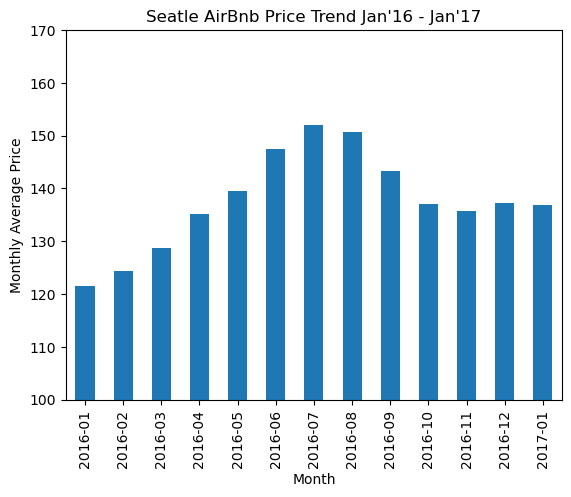

In [88]:
# Limit to specific price range so the visualization shows relevant range.

list_ylim = (100.00, 170.00)

caldf4_mpt.plot(kind='bar',
                y='mean_price',
                x='month',
                xlabel='Month',
                ylabel='Monthly Average Price',
                ylim=list_ylim,
                grid=False,
                legend=False,
                title="Seatle AirBnb Price Trend Jan'16 - Jan'17")

### As we see from the chart above, July has the most expensive average rental prices followed by August. 

### Plot a line chart for monthly average price over available period to show the month over month change.

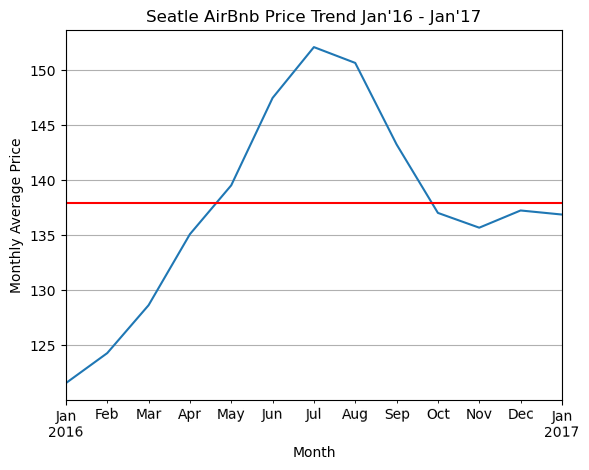

In [89]:
caldf4_mpt.plot(kind='line',
                x='month',
                y='mean_price',
                xlabel='Month',
                ylabel='Monthly Average Price',
                grid='True',
                legend=False,
                rot=1,
                title="Seatle AirBnb Price Trend Jan'16 - Jan'17")

# add the average price line to the existing plot
plt.axhline(y=average_price, color='r', linestyle='-')

### Above line-chart shows how the monthly average prices compare to the annual average price of $138.

## 6. Deployment 
#### Since this is a one time project, stakeholders will be access the results as a blog on Medium.com. Here is link to the blog: https://medium.com/@dk2127/key-insights-into-the-airbnb-prices-7931787df142


## Conclusion

### There are several factors that can help hosts set daily rental prices, namely more guests included, higher no. of bedrooms, bathrooms, lower extra guest charges,  etc. However there are other factors that negatively impact the price, such as higher extra guest charges, shared room, lower no.of reviews, etc. The popular neighborhoods can be determined based on no. of listings available in those areas, that can new hosts can think about opening new rental. The tourists can also determine or choose to rent in popular neighborhoods.
